# 2. Image Segmentation and Thresholding

### Simple Thresholding

In [2]:
# Step 1: Import libraries and Image Preparation
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# Step 2: Helper Function
 


def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

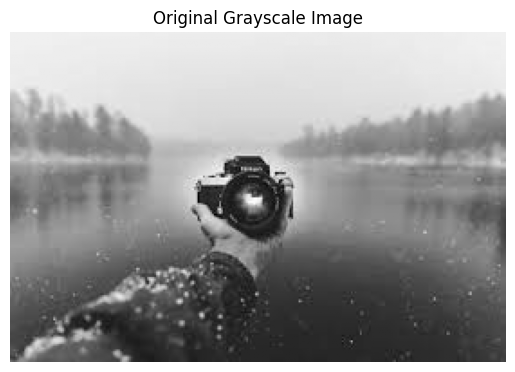

In [4]:
# Step 3: Display the Original Image

show_image(gray_image, 'Original Grayscale Image')

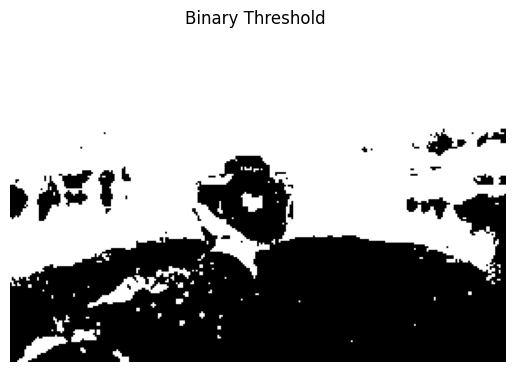

In [5]:
#Step 4: Binary Threshold
 

_, thresh_binary = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
show_image(thresh_binary, 'Binary Threshold ')


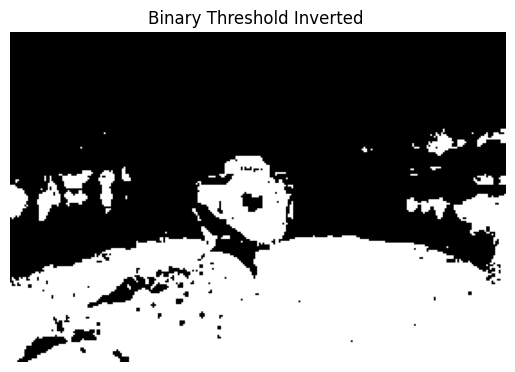

In [6]:
#Step 5: Binary Threshold Inverted
 

_, thresh_binary_inv = cv2.threshold(
    gray_image, 120, 255, cv2.THRESH_BINARY_INV)
show_image(thresh_binary_inv, 'Binary Threshold Inverted ')

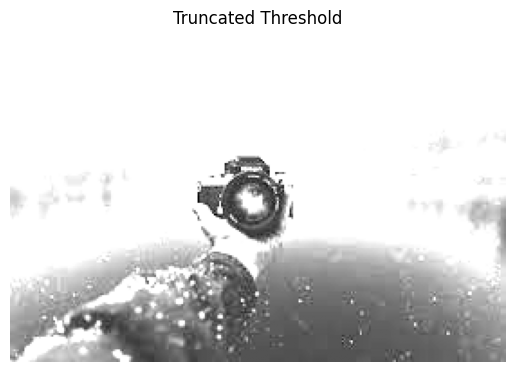

In [7]:
#Step 6: Truncated Threshold
 

_, thresh_trunc = cv2.threshold(gray_image, 120, 255, cv2.THRESH_TRUNC)
show_image(thresh_trunc, 'Truncated Threshold')


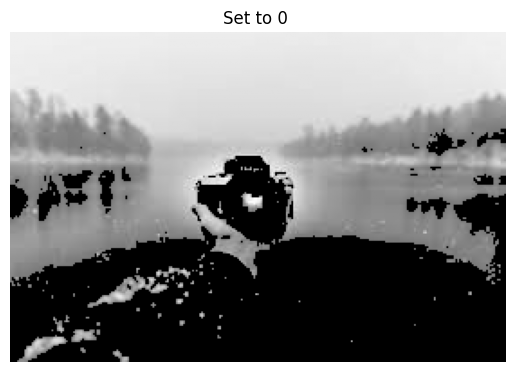

In [8]:
#Step 7: To Zero Threshold
  

_, thresh_tozero = cv2.threshold(gray_image, 120, 255, cv2.THRESH_TOZERO)
show_image(thresh_tozero, 'Set to 0 ')

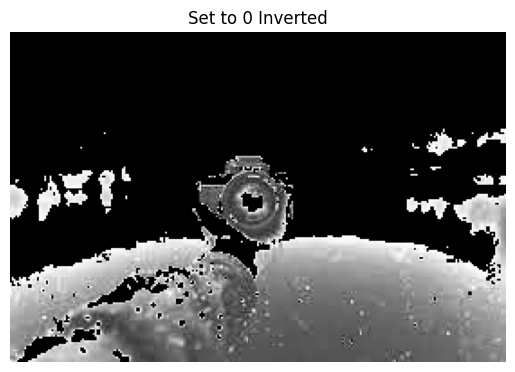

In [9]:
#Step 8: To Zero Inverted Threshold
 

_, thresh_tozero_inv = cv2.threshold(
    gray_image, 120, 255, cv2.THRESH_TOZERO_INV)
show_image(thresh_tozero_inv, 'Set to 0 Inverted')

### Adaptive Thresholding

In [10]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
#Step 2: Helper Function
 

def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

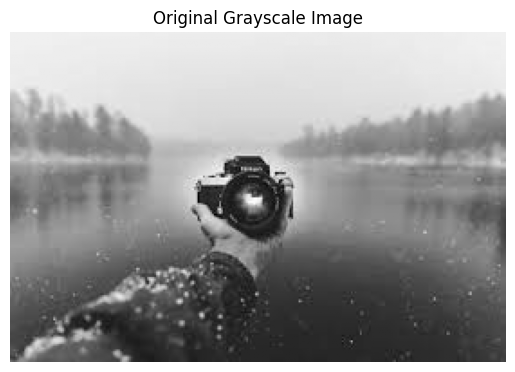

In [12]:
#Step 3: Display Original Image

show_image(gray_image, "Original Grayscale Image")

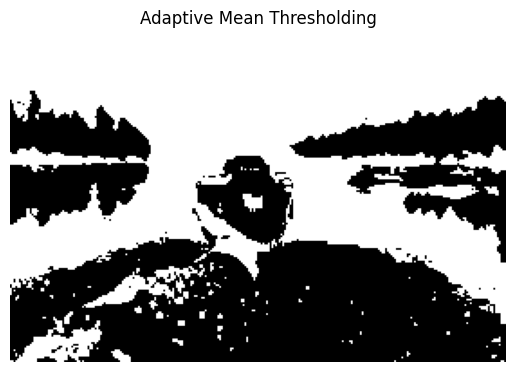

In [13]:
#Step 4: Adaptive Mean Thresholding
 

thresh_mean = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    199, 5
)
show_image(thresh_mean, "Adaptive Mean Thresholding")

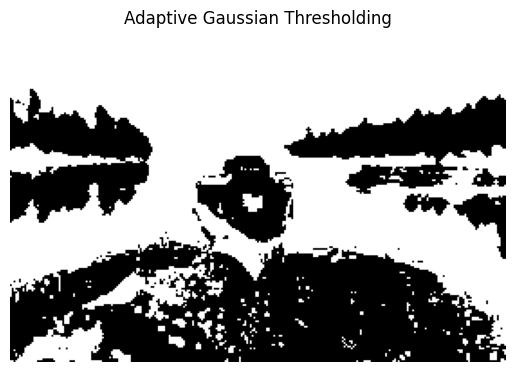

In [14]:
#Step 5: Adaptive Gaussian Threosholding

thresh_gauss = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    199, 5
)
show_image(thresh_gauss, "Adaptive Gaussian Thresholding")

### Otsu Thresholding

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
# Step 2: Helper Function
 

def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

Calculated Otsu threshold value: 152.0


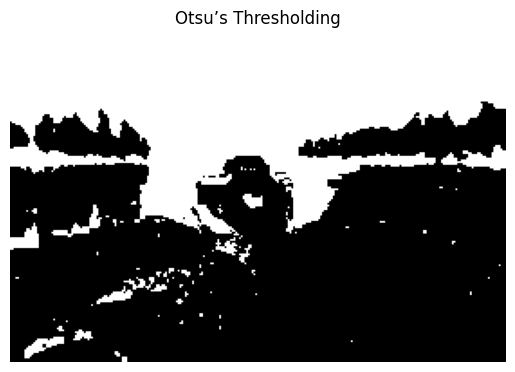

In [18]:
#Otsu’s Thresholding
 

ret, otsu_thresh = cv2.threshold(
    gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Calculated Otsu threshold value:", ret)
show_image(otsu_thresh, "Otsu’s Thresholding")

### Image segmentation using Morphological operations in Python

In [5]:
#Step 1: Import the required libraries
 

import numpy as np
import cv2
from matplotlib import pyplot as plt
 

In [1]:
#Step 2: Upload and Decode the Image
 

import cv2
img = cv2.imread("image1.jfif")
print("Loaded:", img is not None)

Loaded: True


In [2]:
#Step 3: Convert to Greyscale and Blur
 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

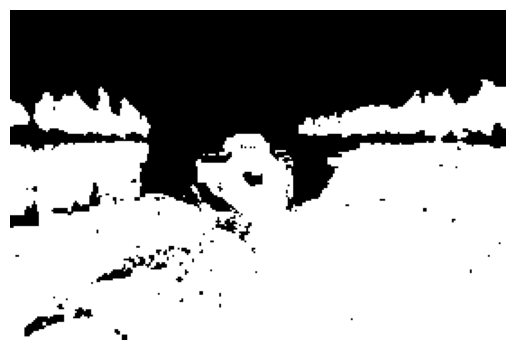

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

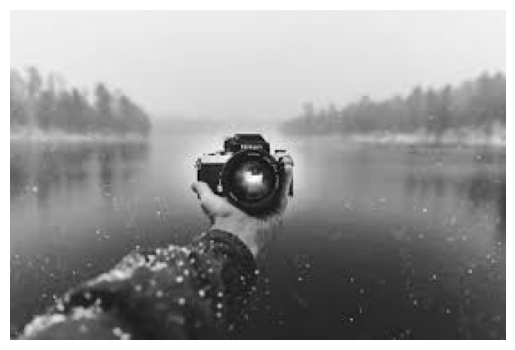

In [6]:
#Step 4: Apply OTSU's Thresholding
 
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(gray, cmap='gray')
plt.axis('off')

In [7]:
#Step 5: Morphological Closing and Background Dilation
 

kernel = np.ones((9, 9), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

bg = cv2.dilate(closing, kernel, iterations=2)

In [8]:
#Step 6: Contour Filtering and Object Mask Creation


contours, _ = cv2.findContours(
    closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = np.zeros(gray.shape, dtype=np.uint8)
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.fillPoly(result, [contour], 255)

In [9]:
#Step 7: Morphological Opening and Erosion
 

kernel_open = np.ones((6, 6), np.uint8)
opened_result = cv2.morphologyEx(
    result, cv2.MORPH_OPEN, kernel_open, iterations=2)

kernel_erode = np.ones((9, 9), np.uint8)
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)

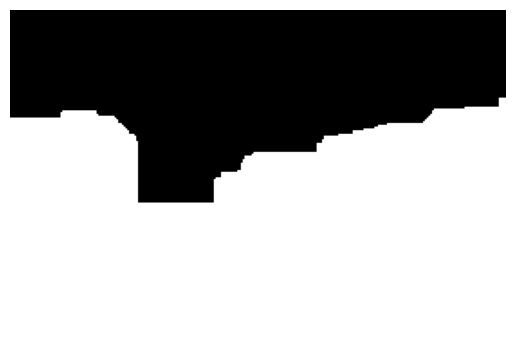

In [10]:
#Step 8: Result

final_result = cv2.erode(opened_result, kernel_erode, iterations=2)
plt.imshow(final_result, cmap='gray')
plt.axis('off')
plt.show()